In [ ]:
import math
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [ ]:
f1 = np.random.uniform(low = -50, high = 50, size = 500)
f2 = np.random.uniform(low = -50, high = 50, size = 500)

df = pd.DataFrame({"f1" : f1, "f2" : f2})
print(df.shape,)
df.head()

(500, 2)


,f1,f2
0,-17.155656,8.938363
1,-8.426591,15.894342
2,-22.720627,43.627829
3,-38.270357,25.557751
4,45.042721,-7.043091


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


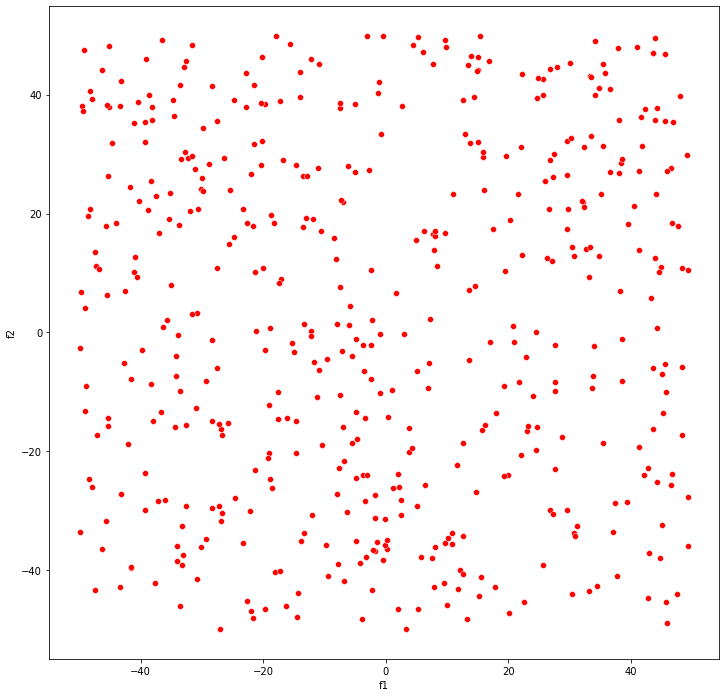

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(df['f1'], df['f2'], color = 'red')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [ ]:
def fx(x, w1, w2):
  return (-w1/w2)*x

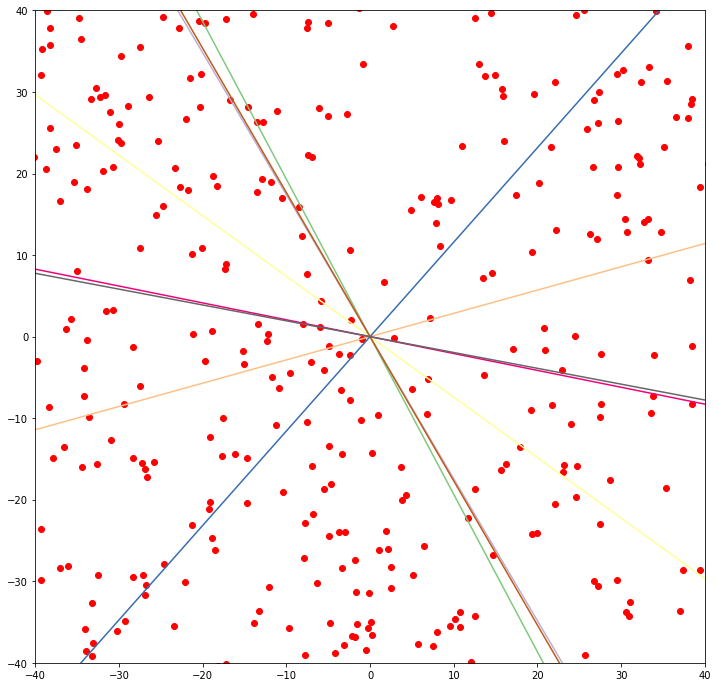

In [ ]:
NUM_HYPERPLANES = 8

colors = matplotlib.cm.get_cmap("Accent").colors
plt.figure(figsize = (12,12))
plt.scatter(f1, f2, c='red')

w1_list = []
w2_list = []

for i in range(NUM_HYPERPLANES):
  w1 = np.random.normal()
  w2 = np.random.normal()
  w1_list.append(w1)
  w2_list.append(w2)

  # y = mx form (passing throug origin) where m = -(w1/w2) for (w1x1 + w2x2 = 0) as the equation of the hyperplane
  plt.plot(np.array([np.min(f1), np.max(f1)]), 
           fx(np.array([np.min(f1), np.max(f1)]), w1, w2), c = colors[i % len(colors)])
  plt.xlim([-40,40])
  plt.ylim([-40,40])

In [ ]:
class LSH:

  def __init__(self,num_hyperplanes = 8,max_iter = 100):
    self.num_hyperplanes = num_hyperplanes
    self.w1_list = []
    self.w2_list = []
    self.hash_maps = {}
  
  def fit(self,X):
    self.X_train = X

    # generate hyperplanes                    
    for i in range(self.num_hyperplanes):
      w1 = np.random.normal()
      w2 = np.random.normal()
      self.w1_list.append(w1)
      self.w2_list.append(w2)
    
    # assign each point to signed hash bucket
    for i in range(self.X_train.shape[0]):
      hash_list = []
      for j in range(self.num_hyperplanes):
        if (self.w1_list[j]*self.X_train[i][0]) + (self.w2_list[j]*self.X_train[i][1]) >= 0:
          hash_list.append(1)
        else:
          hash_list.append(-1)
      if tuple(hash_list) in self.hash_maps:
        self.hash_maps[tuple(hash_list)].append(i)
      else:
        self.hash_maps[tuple(hash_list)] = [i]
  
  def fx(self,x,a,b):
    return -(a/b)*x
    
  def plot_partition_spaces(self):
    colors = matplotlib.cm.get_cmap("Accent").colors
    plt.figure(figsize = (12,12))
    plt.scatter(self.X_train[:,0], self.X_train[:,1], c='red')
    for i in range(self.num_hyperplanes):
      plt.plot(np.array([np.min(self.X_train[:,0]),np.max(self.X_train[:,0])]), 
               self.fx(np.array([np.min(self.X_train[:,0]),np.max(self.X_train[:,0])]), self.w1_list[i], self.w2_list[i]), 
               c = colors[i % len(colors)])
      plt.xlim([np.min(self.X_train[:,0]),np.max(self.X_train[:,0])])
      plt.ylim([np.min(self.X_train[:,1]),np.max(self.X_train[:,1])])
    plt.show()
  
  # predict for one query point
  def predict(self,x):
    hash_list = []
    for j in range(self.num_hyperplanes):
      if (self.w1_list[j]*x[0]) + (self.w2_list[j]*x[1]) >= 0:
        hash_list.append(1)
      else:
        hash_list.append(-1)
    return self.hash_maps[tuple(hash_list)]

In [ ]:
X = np.array(df)

mylsh = LSH()
mylsh.fit(X)

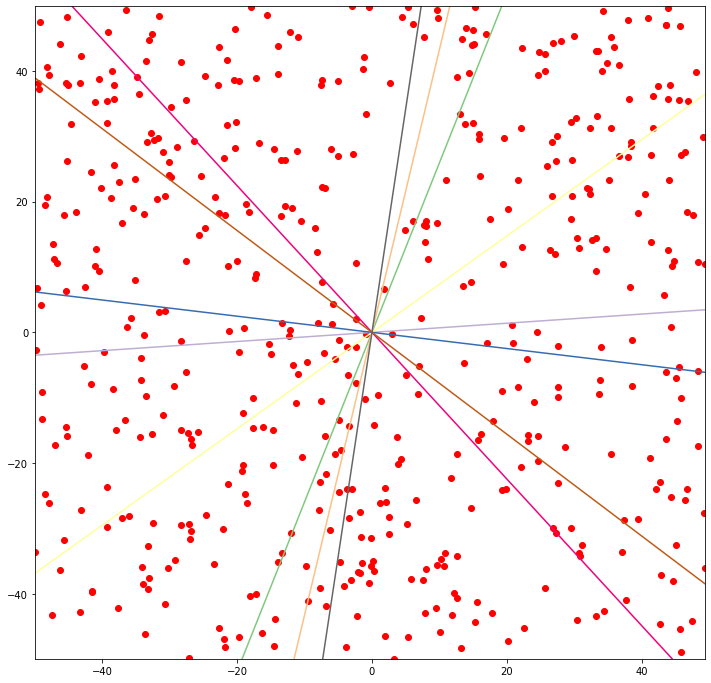

In [ ]:
mylsh.plot_partition_spaces()

In [ ]:
MAX_ITER = 100
x_q = np.array([6.5,-39])

set_points = set()
NUM_NEIGHBOURS = 5

for i in range(MAX_ITER):
  mylsh = LSH()
  mylsh.fit(X)
  preds = mylsh.predict(x_q)
  if len(set_points) == 0:
    set_points = set_points.union(preds)
  else:
    if len(set_points.intersection(preds)) < NUM_NEIGHBOURS:
      break
    else:
      set_points = set_points.intersection(preds)
  

print('Len of set = ',len(set_points))
print('Ran for iterations = ',i + 1)
print('nearest neighbours = ',set_points)

Len of set =  10
Ran for iterations =  14
nearest neighbours =  {96, 449, 452, 485, 74, 19, 147, 277, 254, 447}


In [ ]:
X[list(set_points)]

array([[  2.15172959, -26.00609574],
       [  5.12879827, -29.25645968],
       [  0.95398871,  -9.62566834],
       [  2.49408221, -28.19157759],
       [  5.74206845, -37.74470098],
       [  5.28439946, -46.6020967 ],
       [  7.81703548, -42.93430185],
       [  3.33050674, -49.94394306],
       [  1.91935499, -23.83143926],
       [  2.5275229 , -30.81010967]])

In [ ]:
df['tag'] = 'all'
print(df.shape,)
df.head()

(500, 3)


,f1,f2,tag
0,-17.155656,8.938363,all
1,-8.426591,15.894342,all
2,-22.720627,43.627829,all
3,-38.270357,25.557751,all
4,45.042721,-7.043091,all


In [ ]:
df['tag'].loc[list(set_points)] = 'neighbours'
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,f1,f2,tag
0,-17.155656,8.938363,all
1,-8.426591,15.894342,all
2,-22.720627,43.627829,all
3,-38.270357,25.557751,all
4,45.042721,-7.043091,all


In [ ]:
df.tag.value_counts()

all           490
neighbours     10
Name: tag, dtype: int64

In [ ]:
df_new = df.append({'f1' : x_q[0], 'f2' : x_q[1], 'tag' : 'query'}, ignore_index = True)
print(df_new.shape,)
df_new.head()

(501, 3)


,f1,f2,tag
0,-17.155656,8.938363,all
1,-8.426591,15.894342,all
2,-22.720627,43.627829,all
3,-38.270357,25.557751,all
4,45.042721,-7.043091,all


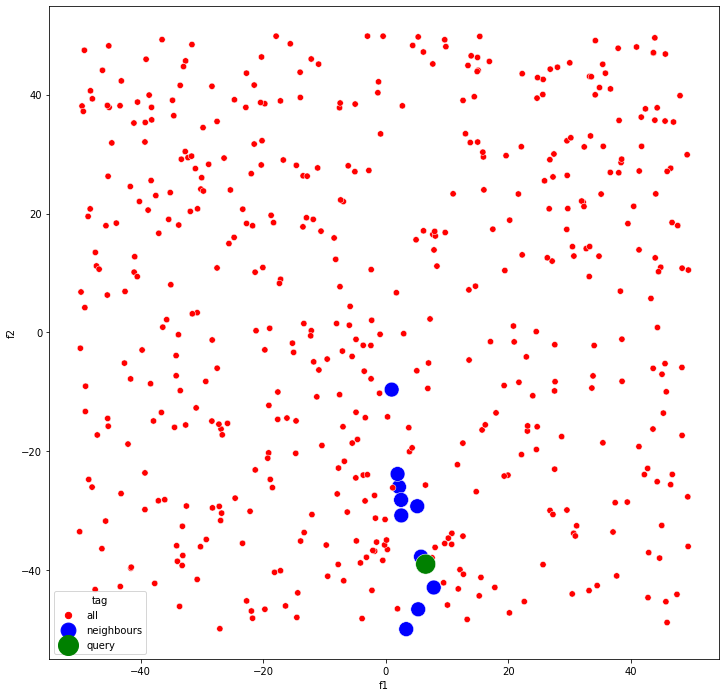

In [ ]:
color_dict = dict({'all':'red',
                  'neighbours':'blue',
                  'query': 'green',
                  })

plt.figure(figsize = (12,12))
sns.scatterplot(data = df_new, x = 'f1',y = 'f2',hue = 'tag',palette=color_dict, size = 'tag',sizes=(400, 40))
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()